# Assignment_03_Digital Humanities_Sentiment_Analysis


## In this assignment I plan on analyzing comments from the New York Times newspaper. More Specifically I will compare the emotional sentiment of the comments from april.2017 with april2018. 
## To start I will first conduct a topic modeling analysis in order to see what the most pressing topics are and then the sentiment analysis using the ANEW Dictionary. 

## First some examples to get started

In [5]:
# I first need to load packages which will be used later
from textblob import TextBlob
import pandas as pd
import numpy as np
import pathlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
import string
import nltk
from nltk.corpus import stopwords
import re

In [8]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
import string

#### As there are thousands of comments and I don’t have time to read through them all and would like to get the gist of the main discussion points.
#### I will be using the Topic modelling algorithm Latent Dirichlet Allocaiton (LDA) in order to get the main frames.

#### First I will have to load the data and get some insights about the datasets. Before comparing both datasets I will start with looking at only the first (april.2017). 

In [9]:
# load the csv file into a Pandas Dataframe called comments_2017
comments_2017 = pd.read_csv(r'C:\Users\Surya\Desktop\Cognitive Science\Semester 4_Master\Master_CogSci\analysis\SentimentAnalysis-master_dwzhou\SentimentAnalysis-master\data_newYork_times\CommentsApril2017\CommentsApril2017.csv')

comments_2017.head(5)


C:\Users\Surya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userLocation,userTitle,userURL,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,"Riverside, CA",NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,<br/>,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Raleigh NC,NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,"Missouri, USA",NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,"Tucson, Arizona",NaN,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News


In [12]:
comments_2017.tail(3) 

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userLocation,userTitle,userURL,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
243829,1493087619,"See above comments. ""deserts"" is the proper.",22259265.0,22259265,<br/>,userReply,1.493076e+09,2,False,22253014.0,...,Boston,NaN,NaN,22253014,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243830,1493042801,John Rubinstein had two brief scenes with Joan...,22250099.0,22250099,<br/>,userReply,1.493019e+09,2,False,22249901.0,...,"New York, NY",NaN,NaN,22249901,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243831,1493042800,"Ye gods and little fishes, Stu, you're right ....",22252040.0,22252040,<br/>,userReply,1.493039e+09,2,False,22249901.0,...,New Jersey,NaN,NaN,22249901,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review


In [16]:
# Print out first 5 values of CommentBody column as DataFrame
print(comments_2017.iloc[0:5, 1])


0    This project makes me happy to be a 30+ year T...
1    Stunning photos and reportage. Infuriating tha...
2    Brilliant work from conception to execution. I...
3    NYT reporters should provide a contributor's l...
4       Could only have been done in print. Stunning. 
Name: commentBody, dtype: object


In [17]:
print(comments_2017.iloc[0, 1]) #check out the first comment

This project makes me happy to be a 30+ year Times subscriber... continue to innovate across all platforms, please.


#### take a look at the number of characters present in each comment. This can provide me with a rough idea about the comment length.

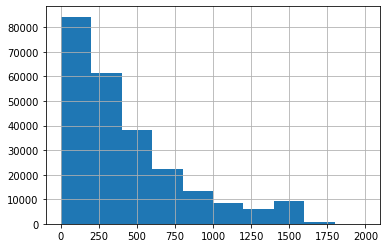

In [22]:
comments_2017["commentBody"].str.len().hist() #also plot the comment length as histogram

#### We can see that most comments are very short. There is only a larger amount of used characters starting from 1300. This may be because these are comments that are more deliberate and thought through instead of purely short comments that primarily convey emotional feelings. Lets look at more details, such as most common words or the amount of words per comment. 

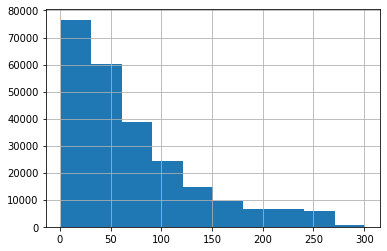

In [24]:
comments_2017["commentBody"].str.split().map(lambda x: len(x)).hist() # plotting number of words appearing in each comment
# this does not provide me with more insight. 

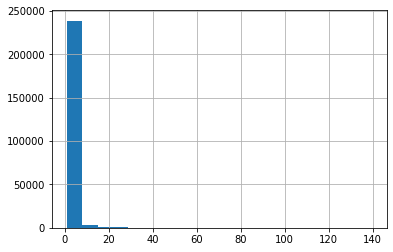

In [39]:
comments_2017["commentBody"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist( bins=20)
# checks out the average word length per comment


### Create the corpus

In [6]:
# option 1
corpus=[]
comments = comments_2017["commentBody"].str.split()
comments = comments.values.tolist()
corpus = [word for i in comments for word in i]



In [10]:
print(corpus[0:200]) #look at the first 200 words from the comments corpus

['This', 'project', 'makes', 'me', 'happy', 'to', 'be', 'a', '30+', 'year', 'Times', 'subscriber...', 'continue', 'to', 'innovate', 'across', 'all', 'platforms,', 'please.', 'Stunning', 'photos', 'and', 'reportage.', 'Infuriating', 'that', 'the', 'Trump', "admistration's", 'draconian', 'reinstatement', 'of', 'the', 'global', 'gag', 'order', 'will', 'prevent', 'men', 'and', 'women', 'from', 'receiving', 'appropriate', 'family', 'planning', 'advice,', 'so', 'obviously', 'desperately', 'needed.', 'Brilliant', 'work', 'from', 'conception', 'to', 'execution.', "I've", 'never', 'seen', 'anything', 'like', 'it.', 'As', 'a', 'paper', 'of', 'record', 'it', 'is', 'important', 'to', 'leave', 'a', 'record', 'of', 'these', 'and', 'other', 'peoples', 'for', 'whom', 'no', 'one', 'else', 'speaks.', 'Please', 'keep', 'humanizing', 'what', 'are', 'otherwise', 'bland', 'statistics.', 'It', 'matters.', 'Time', 'and', 'again', 'their', 'stories', 'sounded', 'like', 'mine,', 'could', 'have', 'been', 'mine.'

In [51]:
# this does not create a corpus but merely a dataframe with the variable commentBody
comments2 = comments_2017["commentBody"]

In [53]:
print(comments2)

0         This project makes me happy to be a 30+ year T...
1         Stunning photos and reportage. Infuriating tha...
2         Brilliant work from conception to execution. I...
3         NYT reporters should provide a contributor's l...
4            Could only have been done in print. Stunning. 
                                ...                        
243827    Sorry, but pudding has nothing to do with it; ...
243828    While it would be quite punny to spell it "des...
243829         See above comments. "deserts" is the proper.
243830    John Rubinstein had two brief scenes with Joan...
243831    Ye gods and little fishes, Stu, you're right ....
Name: commentBody, Length: 243832, dtype: object


#### Load Stopwords

In [10]:
#import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from collections import Counter
from collections import defaultdict

<BarContainer object of 10 artists>

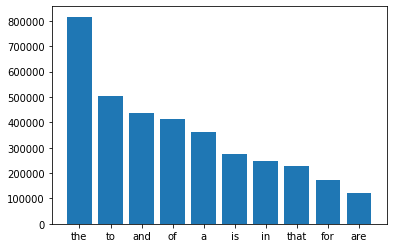

In [9]:
dic = defaultdict(int)  ## plots the top 10 stopwords...which I would eventually want to get rid of. 
for word in corpus:
    if word in stop:
        dic[word] += 1
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)

### Now I try to proceed with the topic model

#### The first step is to properly clean the text. Thus do some Pre-processing of the text data. This process of converting data to something a computer can understand is referred to as pre-processing. These steps include setting all words to lowercase, removing punctuation and stopwords, and stemming (reducing the words to their root form). For this I will use a function and the SnowballStemmer from the nltk package. 

In [12]:
# load the needed stemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
import string

In [13]:
# NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
print(stopwords.words('english')) # look at the list (which can also be modified)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# I will use the english list of stopwords and asign them to a variable. 
stop_words = stopwords.words("english")

In [15]:
# now build the function which I will call tokenizer

def tokenizer(text):
    '''
    -covert everything to lowercase
    -remove punctuations
    -remove stopwords
    -stemmer
    '''
    #All characters in this string will be converted to lowercase
    text = text.lower()
    
    #Removing sentence punctuations
    for punctuation_mark in string.punctuation:
        text = text.replace(punctuation_mark,'')
    
    #Creating our list of tokens
    list_of_tokens = text.split(' ')
    #Creating our cleaned tokens list 
    cleaned_tokens = []
    #Let us use a stemmer
    stemmer = SnowballStemmer(language = 'english')
    
    #Removing Stop Words in our list of tokens and any tokens that happens to be empty strings
    for token in list_of_tokens:
        if (not token in stop_words) and (token != ''):
            #Stem tokens
            token_stemmed = stemmer.stem(token)
            #appending our finalized cleaned token
            cleaned_tokens.append(token_stemmed)
    
    return cleaned_tokens
            


#####  better not use this!!!

In [16]:
## this does work but it does not correctly apply the tokenizer function on each row of the needed column
# this operation is also veeery slow because it loops through every item and applied the long function to it



pp_text_col = [] # add the preprocessed text column to my dataframe
for text_data in comments_2017['commentBody']:
    pp_text_data = tokenizer(text_data)
    pp_text_col.append(pp_text_data)
comments_2017['pp_text_old'] = pp_text_col #name the new cleaned column pp_text


##### alternative option to apply cleaner/tokenizer function to data frame

In [31]:
# just one example of how to apply a function to a dataframe and add it to a new column
def operation(x):
    y = x+4
    return y

In [33]:
my_dict = {"first":[1, 5, 4, 2, 5], "second":["this is a longer string","another comment about a string","wow, nice weather outside","why am I still in here?","lets go out into the sun!"]}
my_dict

{'first': [1, 5, 4, 2, 5],
 'second': ['this is a longer string',
  'another comment about a string',
  'wow, nice weather outside',
  'why am I still in here?',
  'lets go out into the sun!']}

In [34]:
df = pd.DataFrame(my_dict)
df

,first,second
0,1,this is a longer string
1,5,another comment about a string
2,4,"wow, nice weather outside"
3,2,why am I still in here?
4,5,lets go out into the sun!


In [36]:
df["third"]= df["first"].apply(operation) #ads new column which applies the operations function to the first column
df


,first,second,third
0,1,this is a longer string,5
1,5,another comment about a string,9
2,4,"wow, nice weather outside",8
3,2,why am I still in here?,6
4,5,lets go out into the sun!,9


#### Now I try to clean the text the proper way and add it to a new column in my dataframe (called "pp_text")

In [37]:
### try this as alternative, but also add it to a new col
#comments_2017.commentBody.apply(tokenizer)

KeyboardInterrupt: 

In [38]:
comments_2017["pp_text"] = comments_2017["commentBody"].apply(tokenizer) #apply the tokenizer function to the commentBody column and asign it to a new column

In [39]:
comments_2017.head(5) #look if the new column was added 

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userURL,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial,pp_text_old,pp_text
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,"[project, make, happi, 30, year, time, subscri...","[project, make, happi, 30, year, time, subscri..."
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,"[stun, photo, reportag, infuri, trump, admistr...","[stun, photo, reportag, infuri, trump, admistr..."
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,"[brilliant, work, concept, execut, ive, never,...","[brilliant, work, concept, execut, ive, never,..."
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,"[nyt, report, provid, contributor, link, crowd...","[nyt, report, provid, contributor, link, crowd..."
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,NaN,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News,"[could, done, print, stun]","[could, done, print, stun]"


In [40]:
comments_2017.info() # we see that the new pp_text column is also a string object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243832 entries, 0 to 243831
Data columns (total 36 columns):
approveDate              243832 non-null int64
commentBody              243832 non-null object
commentID                243832 non-null float64
commentSequence          243832 non-null int64
commentTitle             228498 non-null object
commentType              243832 non-null object
createDate               243832 non-null float64
depth                    243832 non-null int64
editorsSelection         243832 non-null bool
parentID                 243832 non-null float64
parentUserDisplayName    70527 non-null object
permID                   243832 non-null object
picURL                   243832 non-null object
recommendations          243832 non-null float64
recommendedFlag          0 non-null float64
replyCount               243832 non-null float64
reportAbuseFlag          0 non-null float64
sharing                  243832 non-null int64
status                   243832 non

In [41]:
# print out the first few rows of the cleaned text column
print(comments_2017.loc[0:10, ['pp_text']]) # seems to work ok

                                              pp_text
0   [project, make, happi, 30, year, time, subscri...
1   [stun, photo, reportag, infuri, trump, admistr...
2   [brilliant, work, concept, execut, ive, never,...
3   [nyt, report, provid, contributor, link, crowd...
4                          [could, done, print, stun]
5   [thank, new, york, time, peopl, support, encou...
6   [proof, photojourn, aliv, well, excel, work, m...
7   [oasi, initi, start, prof, malcolm, pott, uc, ...
8   [agre, ive, spent, 30, minut, tri, find, place...
9               [katrina, pierson, back, palookavill]
10  [fool, peopl, time, brbrtherein, lie, djts, po...


#### previous does not work well, so this is an alternative way to pre-process

#### Before proceeding I now need to convert the text data into a term-frequency inverse document matrix (TF-IDF) which is used to convert sentences into vectors in order to get some semantic understanding. <p> To be more precise the term frequency (TF) part is made out of:</p> 
TF = Number of repetition of words in doc or sentence / number of words in sentence or doc

IDF = Log of number of sentences / Number of sentences containing the word

--> Aim: get the importance of a word in a sentence or document. This is vital to find out the most essential documents for a certain word. It helps to get the order of importance to identify clusters. 

In Sum TF-IDF  looks for a word freq in a single text, respectively to that words use across the corpus as a whole. It is a way of finding out the degree to which a term say "violence" is used in a document relative to other documents. 
    

In [42]:
# I will use tfidVectorizer of the package sklearn to convert a collection of raw documents to a matrix of TF-IDF features.
# This will compute tf-idf scores on all documents in my dataframe.
from sklearn.feature_extraction.text import TfidfVectorizer
    
    

In [58]:
# max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". 
# For example:
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".
# The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". 
# Thus, the default setting does not ignore any terms.

# lets look at the column i need to analyze
print(comments_2017.commentBody)


# I have 243.832 comments and the datatype is string(object)

0         This project makes me happy to be a 30+ year T...
1         Stunning photos and reportage. Infuriating tha...
2         Brilliant work from conception to execution. I...
3         NYT reporters should provide a contributor's l...
4            Could only have been done in print. Stunning. 
                                ...                        
243827    Sorry, but pudding has nothing to do with it; ...
243828    While it would be quite punny to spell it "des...
243829         See above comments. "deserts" is the proper.
243830    John Rubinstein had two brief scenes with Joan...
243831    Ye gods and little fishes, Stu, you're right ....
Name: commentBody, Length: 243832, dtype: object


In [59]:
print(comments_2017.pp_text)

0         [project, make, happi, 30, year, time, subscri...
1         [stun, photo, reportag, infuri, trump, admistr...
2         [brilliant, work, concept, execut, ive, never,...
3         [nyt, report, provid, contributor, link, crowd...
4                                [could, done, print, stun]
                                ...                        
243827    [sorri, pud, noth, desert, one, deserv, henc, ...
243828    [would, quit, punni, spell, dessert, phrase, d...
243829                       [see, comment, desert, proper]
243830    [john, rubinstein, two, brief, scene, joan, cr...
243831    [ye, god, littl, fish, stu, your, right, memor...
Name: pp_text, Length: 243832, dtype: object


In [43]:
# intitiate TF-IDF Vectorizer
tfidf = TfidfVectorizer()


In [69]:
# comments_2017.commentBody refers to the text column of my comments dataframe

#####  this works but does not use the cleaned text column  #####

token_matrix = tfidf.fit_transform(comments_2017.commentBody)
token_matrix

<243832x110901 sparse matrix of type '<class 'numpy.float64'>'
	with 12716402 stored elements in Compressed Sparse Row format>

In [32]:
feature_names = tfidf.get_feature_names() #or also token names
feature_names

['00',
 '000',
 '0000',
 '000000',
 '000000000000001',
 '00000001',
 '0000000117',
 '0000001',
 '000001',
 '0000015b',
 '00000305',
 '000004',
 '00001',
 '00004',
 '00009',
 '0001',
 '0002',
 '0002010058_1_delay',
 '0003',
 '000305',
 '0004',
 '0005',
 '000exemption',
 '000k',
 '000lb',
 '000m',
 '000people',
 '000s',
 '000th',
 '000ths',
 '000x',
 '001',
 '00107',
 '00144feabdc0',
 '001_fa08',
 '002',
 '0028',
 '003',
 '0034',
 '004',
 '0044',
 '005',
 '005146',
 '0056620',
 '0062469991',
 '007',
 '008',
 '009',
 '00999',
 '00a',
 '00am',
 '00clark3',
 '00f9bdd74ed1_story',
 '00k',
 '00p',
 '00pm',
 '00s',
 '01',
 '010',
 '01016',
 '010228080245',
 '011',
 '012',
 '013',
 '014',
 '0143122916',
 '0151625',
 '0152',
 '015h',
 '017',
 '017111',
 '018',
 '019',
 '0196',
 '01c',
 '01chen',
 '01cnd',
 '01internet',
 '01love',
 '01mon2',
 '01mon4',
 '01obesity',
 '01reuters',
 '01st',
 '02',
 '02031701nhv',
 '021',
 '024',
 '024024',
 '025',
 '028',
 '029',
 '02am',
 '02drunk',
 '02friedman'

#### Topic Modeling with LDA (Latent Dirichlet Allocation): algorithm used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model. 

In [38]:
# Import LDA topic modelling plugin from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# I want 10 topics generated 
num_topics = 10

# instatiate LDA model
lda_model = LDA(n_components = num_topics, n_jobs = -1)
lda_model.fit(token_matrix) #fit the tf_idf matrix and apply lda on it

# Looking for the top 20 words for each topic
top_n_words = 20

# Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for topic_num, topic in enumerate (lda_model.components_):
    top_tokens = [feature_names[i] for i in topic.argsort()][::-1][:top_n_words] # #Returns the indices that would sort an array. I use the token or feature names from my tf-idf matrix
    top_n = ', '.join(top_tokens) 
    print(f'Topic {topic_num}: {top_n}')    
    
    
    

Topic 0: the, to, and, of, br, is, that, in, it, for, are, you, they, not, trump, as, this, he, be, have
Topic 1: agree, bravo, brilliant, philip, gabriel, stan, paige, elizabeth, socrates, absolutely, nicer, totally, skies, oleg, couldn, titanic, correct, said, jest, friendly
Topic 2: swamp, draining, jp, drain, thefamilyproperty, blogspot, http, thyroid, nailed, res, archive, hypothyroidism, query, tsh, pet, drained, alligator, python, mem, t3
Topic 3: the, reilly, is, fox, he, her, she, it, and, looks, like, in, women, to, you, bill, news, man, this, that
Topic 4: lol, congratulations, gowdy, chocolate, beautiful, cake, thanks, trey, benghazi, karma, skunk, peas, hahaha, lange, mobil, pod, chameleon, sarandon, crawford, wf
Topic 5: the, to, and, you, br, of, it, in, that, my, for, is, was, this, have, they, not, on, be, united
Topic 6: the, to, br, and, of, tax, for, is, that, it, in, they, will, be, are, not, this, republicans, you, have
Topic 7: the, to, br, and, of, is, he, trump

#### The problem with these topics is that the stopwords are part of the main topics, which should not be the case. This is why I need to perform the analysis with the cleaned text column

Thats why I need to apply these same steps with the cleaned text column

Unfortunately this does not work


In [44]:
# comments_2017.pp_text refers to the text column of my comments dataframe
token_matrix1 = tfidf.fit_transform(comments_2017.pp_text)  

AttributeError: 'list' object has no attribute 'lower'

#### Visualizing topics generated by the LDA model with the pyLDAvis plugin: The pyLDAvis plugin generates an interactive plot, which in my opinion makes easier for me in analyzing the various topics generated as well as how well my LDA model performed.

In [72]:
#Import visualization tools for LDA models
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()



C:\Users\Surya\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [ ]:
#  visualize these topics
pyLDAvis.sklearn.prepare(lda_model, token_matrix, tfidf) ## code took too long to execute. so I stopped the kerne

In [13]:
# comments_2017.pp_text refers to the text column of my comments dataframe
token_matrix1 = tfidf.fit_transform(comments_2017.pp_text)




AttributeError: 'list' object has no attribute 'lower'

### Some testing and playing around before the real work of sentiment analysis starts. 

In [20]:
test_comment1 = "The whole system is about to collapse. I hate this doomed world we live in."
test_comment2 = "I love it when I can wake up while hearing birds singing. This world is beautiful"

In [7]:
# Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. 
# The sentiment function of textblob returns two properties, polarity, and subjectivity.
blob1 = TextBlob(test_comment1)
blob2 = TextBlob(test_comment2)

In [8]:
print(blob1.sentiment)
print(blob2.sentiment)
# we can see that the first sentiment was correctly classified as negative, while the second as rather positive

Sentiment(polarity=-0.15454545454545457, subjectivity=0.6)
Sentiment(polarity=0.675, subjectivity=0.8)


#### Testing with Vader (Valence Aware Dictionary and Sentiment Reasoner) which is a rule-based library for sentiment analysis. It contains intensity measures for each word based on human-annotated labels. It is specialized for text that is rather used in social media. 


In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...


True

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [21]:
vader.polarity_scores(test_comment1)

{'neg': 0.502, 'neu': 0.498, 'pos': 0.0, 'compound': -0.9022}

In [22]:
vader.polarity_scores(test_comment2)

{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.8442}

# Part 2: Sentiment Analysis of the comments

### But I am not interested in pure polarity. I will also need to load my comments too. 


### How to classify Sentiment? -->There are ML methods and Lexicon/dictionary based methods

#### Lexicon-Based: This method uses a variety of words annotated by polarity score (or emotion classes), to decide the general assessment score of a given content. The strongest asset of this technique is that it does not require any training data, while its weakest point is that a large number of words and expressions are not included in sentiment lexicons. Thus in brief: Dictionary-based sentiment analysis works by comparing the words in a text or corpus with pre-established dictionaries of words. 

In [ ]:
# https://methodi.ca/recipes/dictionary-based-sentiment-analysis-python